# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset .
3. Load the data into Python runtime as Pandas dataframe.
4. Split the data into two parts. One dataset containing the last 30 days and one dataset with the rest. You will need the dataset with the last 30 days in part 5  

In [119]:
!pip freeze > requirements.txt

In [120]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:/Users/esharjh/Desktop/SIXT assignment/Bike sharing data/hour.csv")
data1,data2=data.iloc[-30:],data.iloc[:-30]

**Answers / comments / reasoning:**

-data 1 has last 30 days data and rest is in data 2

## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly 12 rentals per day. Visualise the number of bikes that are needed to satisfy demand.
4. Find the maximum number of bicycles `nmax` that was needed in any one day. 


In [121]:
# TODO: your code comes here
data2.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [122]:
data2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000,17349.000000
mean,8675.000000,2.504237,0.501700,6.528330,11.543720,0.028820,3.007493,0.682518,1.425269,0.497467,0.476209,0.627336,0.190142,35.709263,153.899303,189.608565
std,5008.369246,1.106110,0.500012,3.434231,6.913511,0.167305,2.005340,0.465510,0.639577,0.192365,0.171669,0.193052,0.122416,49.335300,151.439729,181.480039
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4338.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8675.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,142.000000
75%,13012.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17349.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [123]:
data2.rename(columns={'dteday':'datetime','hr':'hour','mnth':'month','cnt':'count','yr':'year','hum':'humidity','weathersit':'weather_condition'},inplace=True)

In [124]:
data2.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [125]:
data2.dtypes

instant                int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [126]:
#converting  features into category and datetime
categoryVariableList = ["hour","year","weekday","month","season","weather_condition","holiday","workingday"]
for var in categoryVariableList:
    data2[var] = data2[var].astype("category")
data2['datetime']=pd.to_datetime(data2['datetime'])

In [127]:
data2.dtypes

instant                       int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
count                         int64
dtype: object

In [128]:
data2.shape

(17349, 17)

[Text(0.5, 1.0, 'bike rental count during weekdays and weekends')]

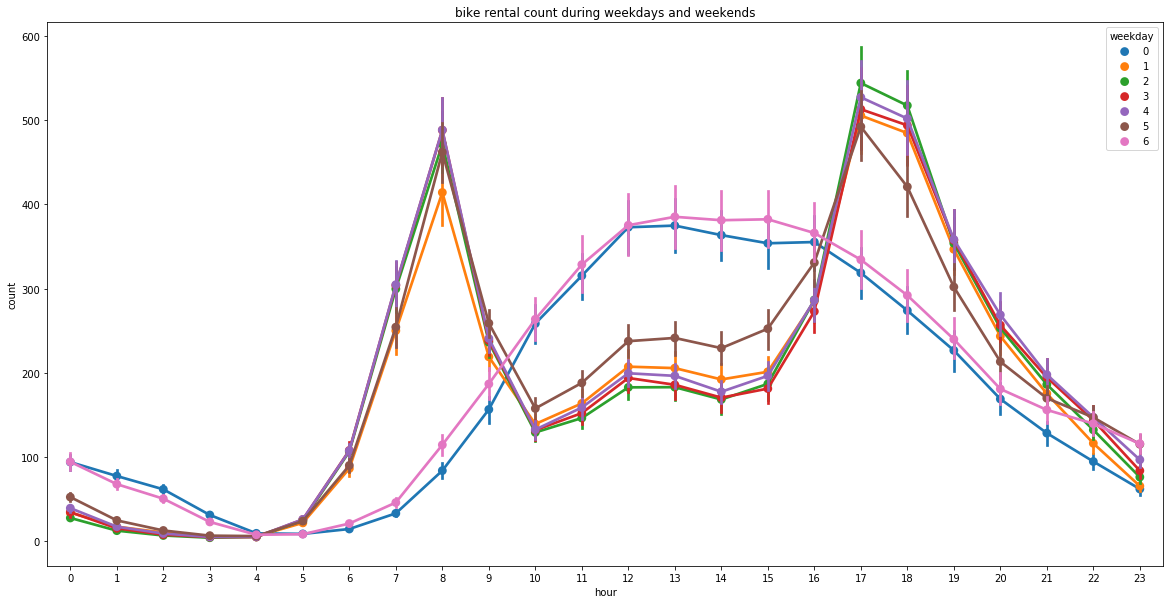

In [129]:
#count on each day of the week every hour
fig, axes = plt.subplots(figsize=(20,10))
sns.pointplot(data=data2[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=axes)
axes.set(title="bike rental count during weekdays and weekends")

[Text(0.5, 1.0, 'bike rental count of casual users')]

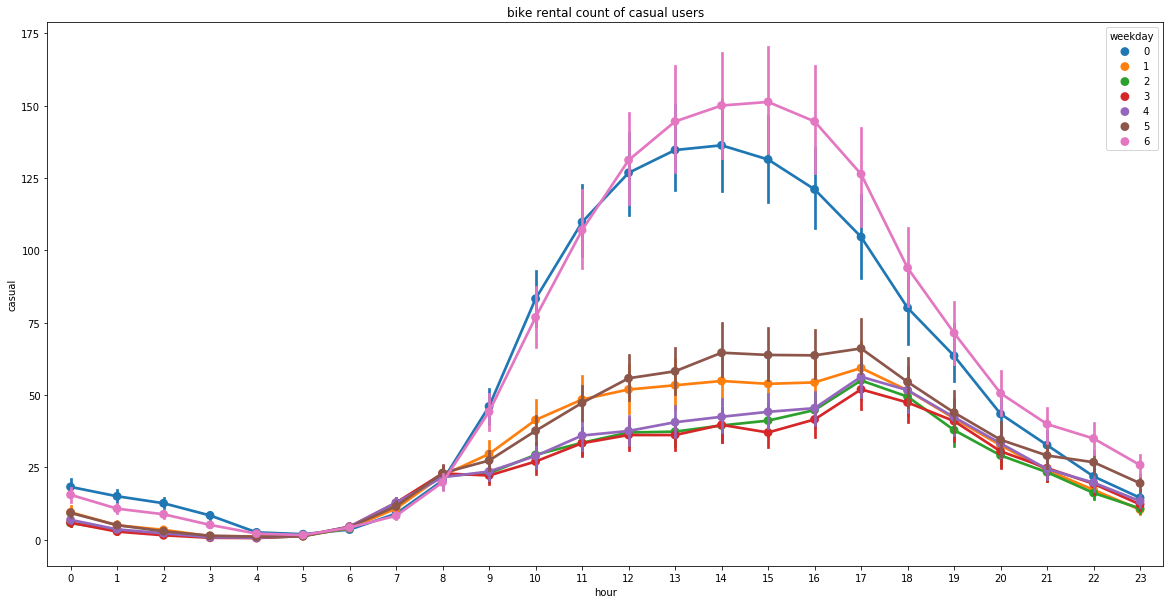

In [130]:
#bike rent count of casual and registered users 
fig, axes = plt.subplots(figsize=(20,10))
sns.pointplot(data=data2[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=axes)
axes.set(title="bike rental count of casual users")

[Text(0.5, 1.0, 'bike rent count of registered users')]

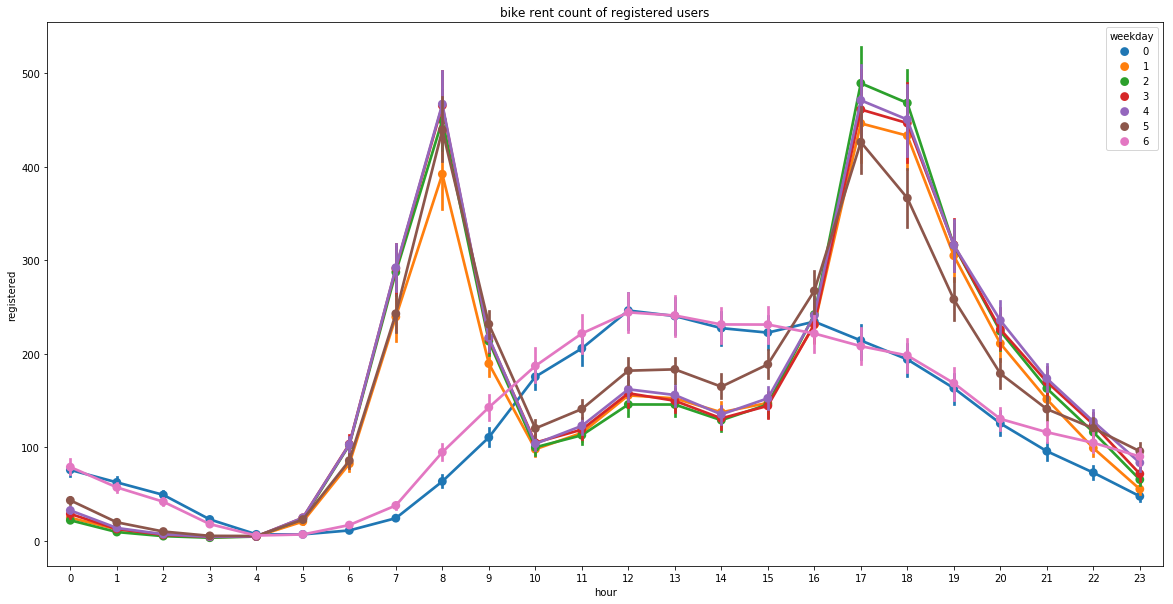

In [131]:
fig, axes = plt.subplots(figsize=(20,10))
sns.pointplot(data=data2[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=axes)
axes.set(title="bike rent count of registered users")

[Text(0.5, 1.0, 'bike rent count as per weather condition')]

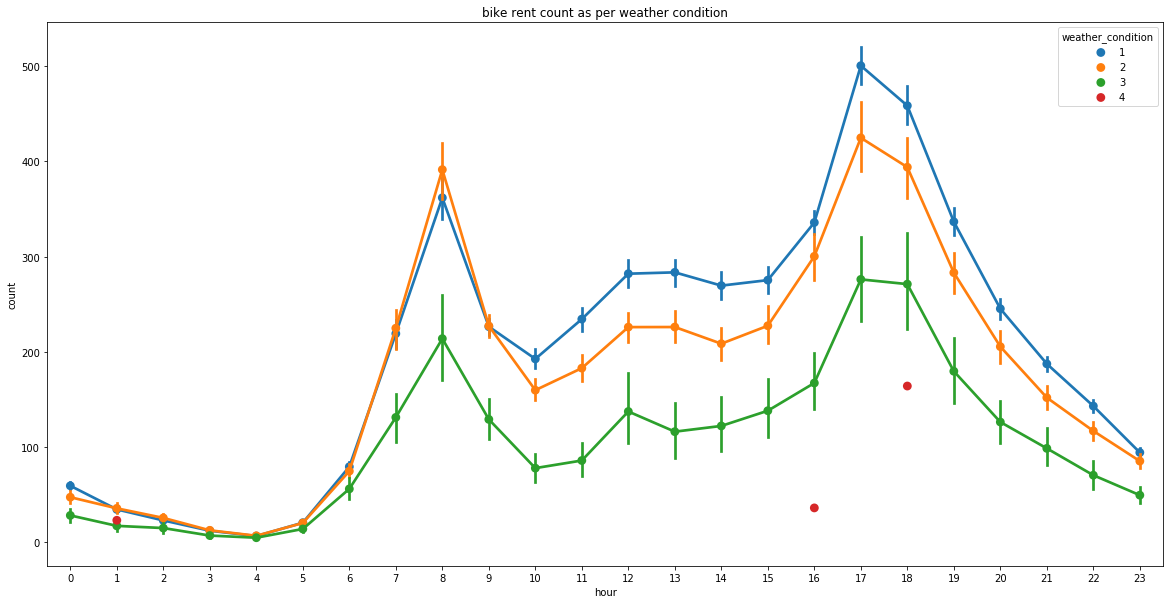

In [317]:
fig, axes = plt.subplots(figsize=(20,10))
sns.pointplot(data=data2[['hour',
                       'count',
                       'weather_condition']],
            x='hour', y='count',
            hue='weather_condition', ax=axes)
axes.set(title="bike rent count as per weather condition")

[Text(0.5, 1.0, 'bike rent count as per season')]

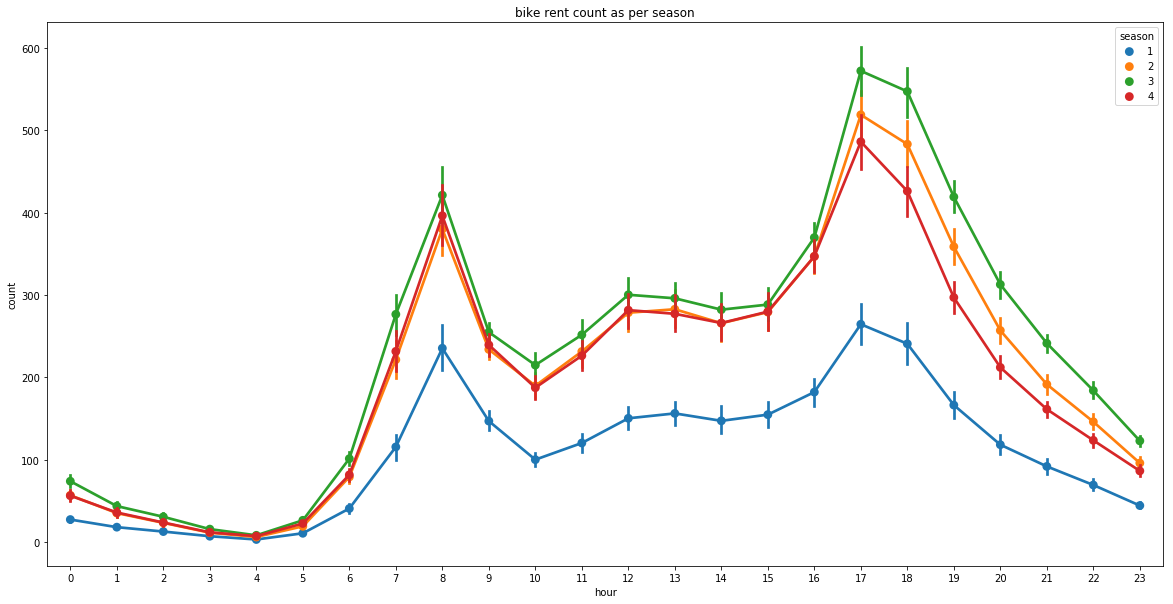

In [318]:
fig, axes = plt.subplots(figsize=(20,10))
sns.pointplot(data=data2[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=axes)
axes.set(title="bike rent count as per season")

[Text(0.5, 1.0, 'Monthly distribution')]

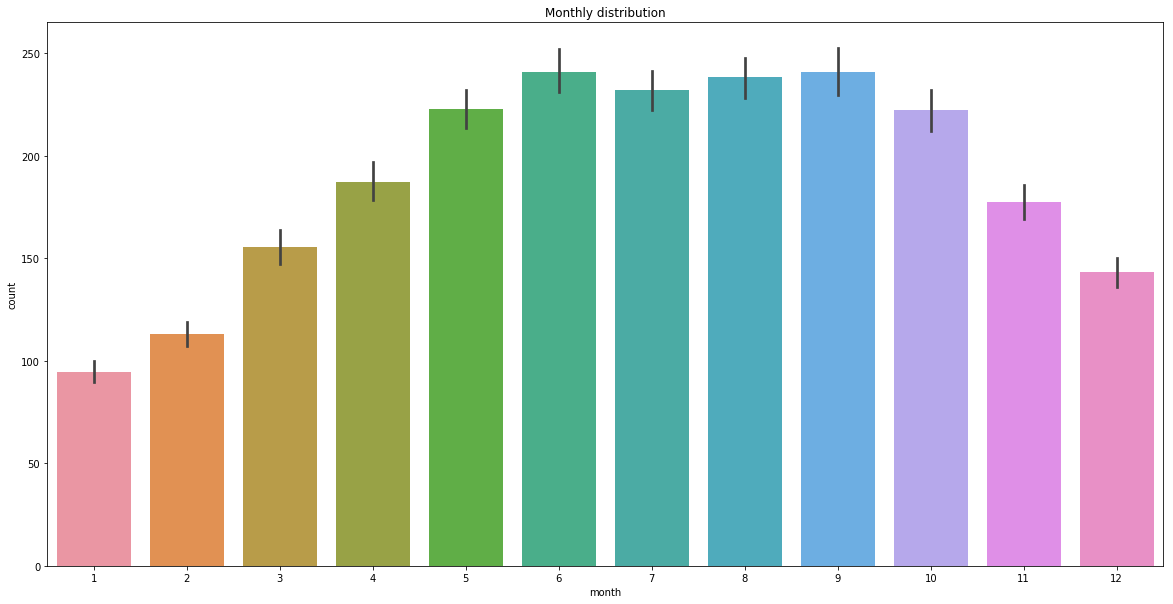

In [134]:
fig, axes = plt.subplots(figsize=(20,10))
sns.barplot(data=data2[['month',
                      'count']],
            x='month', y='count')
axes.set(title="Monthly distribution")

[Text(0.5, 1.0, 'Daily distribution')]

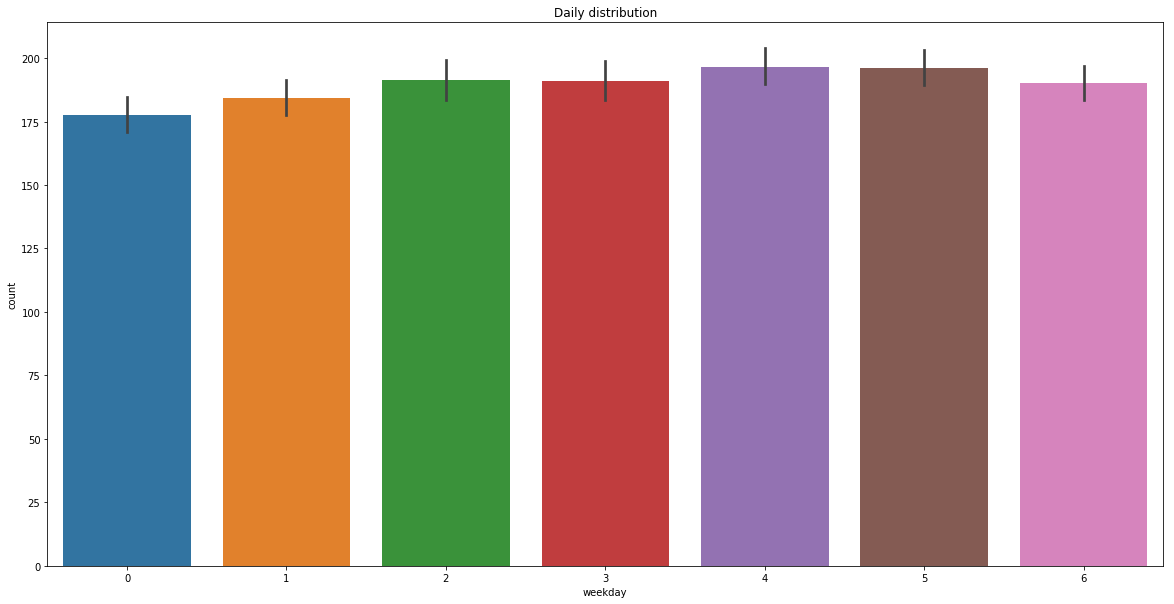

In [135]:
fig, axes = plt.subplots(figsize=(20,10))
sns.barplot(data=data2[['weekday',
                      'count']],
            x='weekday', y='count')
axes.set(title="Daily distribution")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

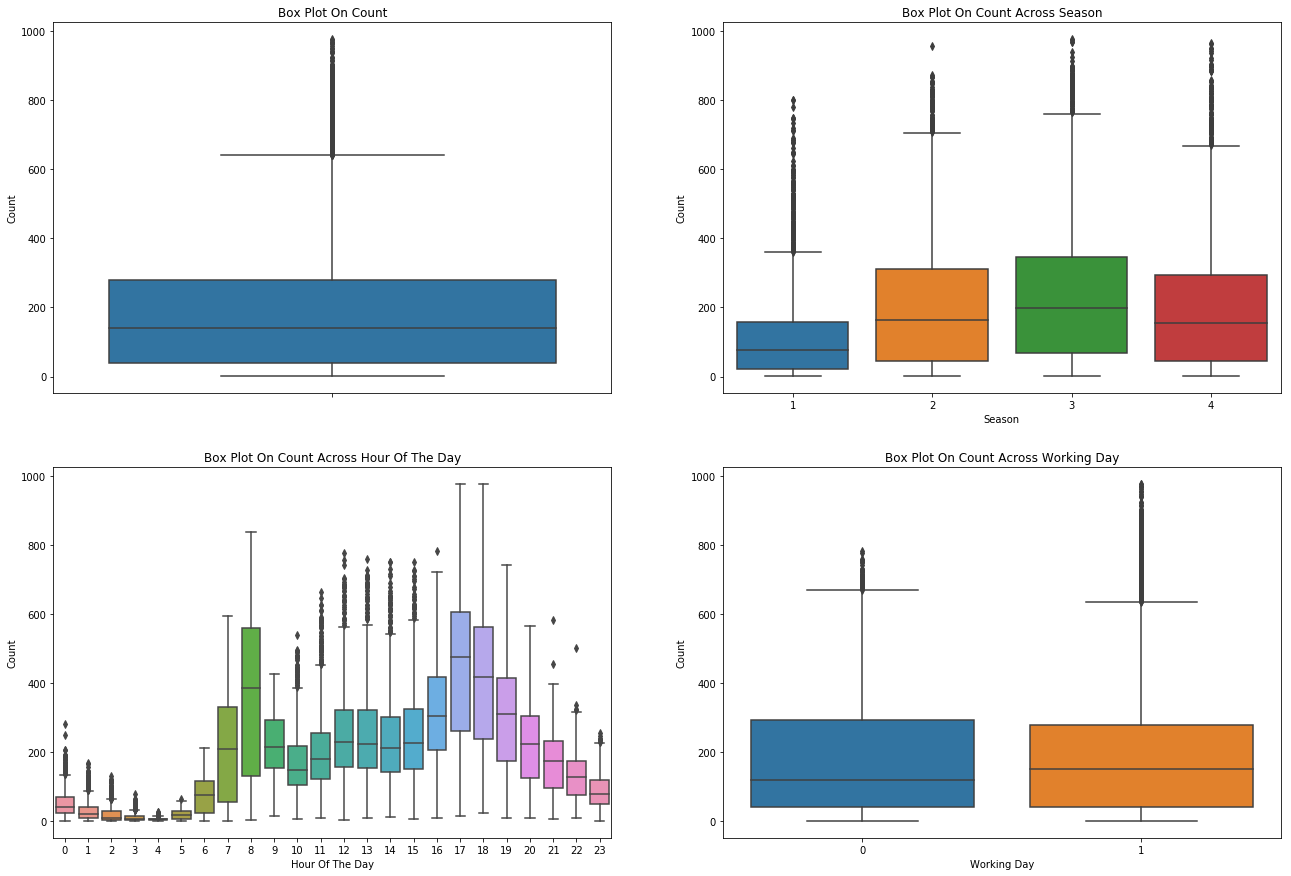

In [136]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(22, 15)
sns.boxplot(data=data2,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=data2,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data2,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=data2,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

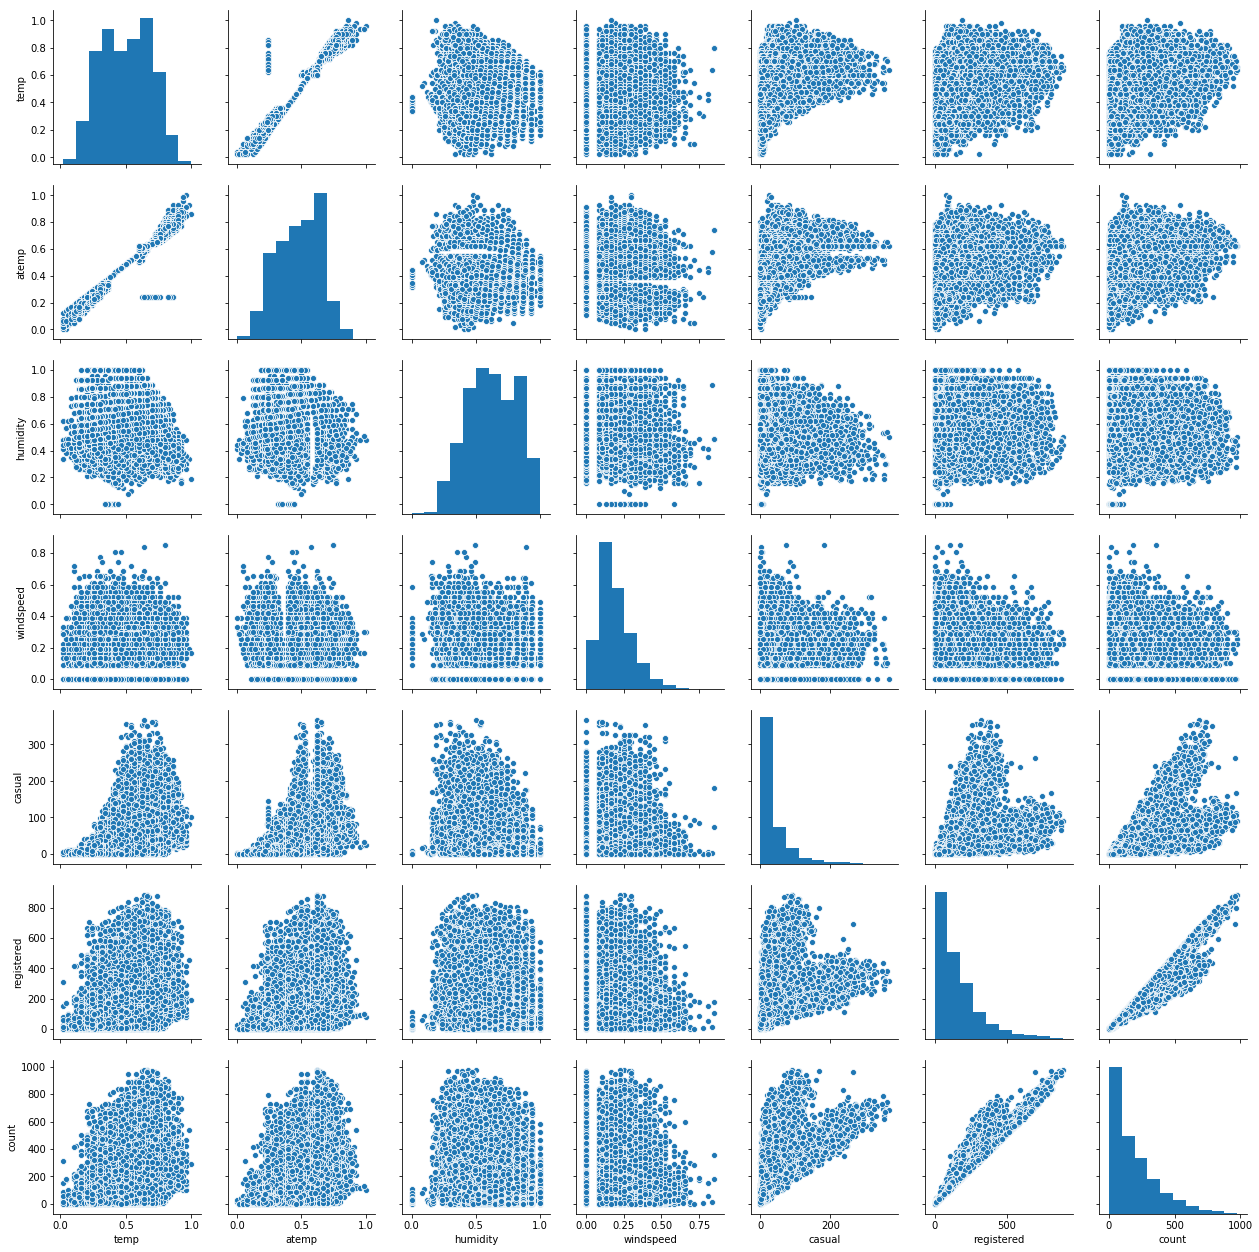

In [137]:
num_feat = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
data2_num= data2[num_feat]
sns.pairplot(data2_num)

In [138]:
data_corr=data2_num.corr()

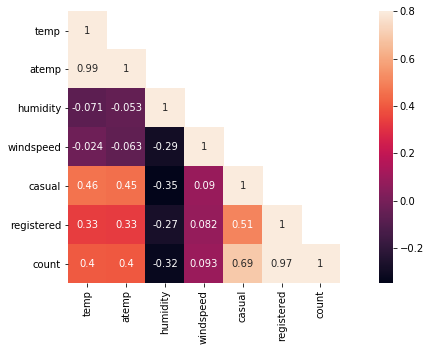

In [139]:
mask = np.array(data_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(data_corr, mask=mask,
           vmax=0.8, square=True,annot=True)

In [141]:
def plot_target(df, ts):
    # Determing rolling statistics
    rolmeanweekly = df[ts].rolling(window = 7, center = False).mean()
    rolmeanmonthly = df[ts].rolling(window = 30, center = False).mean()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean_weekly = plt.plot(rolmeanweekly,
                    color = 'red', 
                    label = 'Rolling Mean Weekly')
    mean_monthly = plt.plot(rolmeanmonthly,
                    color = 'cyan', 
                    label = 'Rolling Mean Monthly')
    plt.legend(loc = 'best')
    plt.title('Actual counts and Rolling Mean for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()

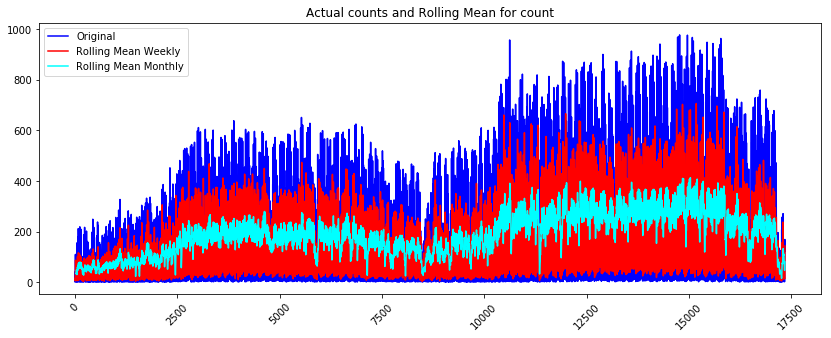

In [142]:
plt.rcParams['figure.figsize'] = (14,5)
plot_target(data2, 'count')

In [315]:
#The maximum number of bicycles nmax that was needed in any one day
df=(data2.groupby(['datetime'])['count'].agg({'count':sum}))
df1=df.sort_values('count',ascending=False)
df1.head()

,count
datetime,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294


In [321]:
nmax=df1['count'][0]
nmax

8714

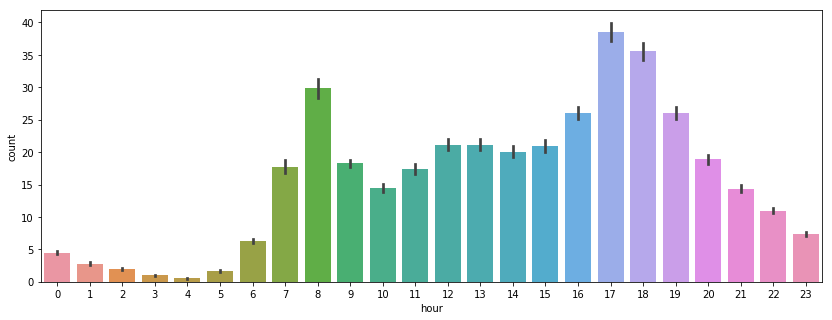

In [232]:
sns.barplot( y = data2['count']/12,
          x = 'hour',
          data = data2)

**Answers / comments / reasoning:**

-usage is different on work days and on weekends. On Sundays and Saturdays, people use more  bikes during afternoon, while during work days bikes are mostly used in the morning and evening.

-casual users tend to use the bikes during afternoon during the all week, while registered users follow the first graph pattern.

-people use more bikes during fall and when the weather is sunny

-As per box plot there are lot of outliers in the count but these can be natural outliers

-temp and humidity features has got positive and negative correlation with count respectively

-windspeed is not gonna be really useful numerical feature as its correlation with count is very less.

-"atemp" and "temp" has got strong correlation with each other(0.99). During model building any one of the variable can be dropped since they will exhibit multicollinearity in the data.

## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn.

In [198]:
cols_to_leave = ['datetime','casual','registered', 'count']
cols_to_use = [col for col in data2.columns if col not in cols_to_leave]
data2_use = data2[cols_to_use]

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data2_use,data2['count'],test_size=0.25,random_state=42)

In [200]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500,max_depth = 3,criterion='mse')

In [201]:
rfModel.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [202]:
pred_y = rfModel.predict(x_test)

In [203]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred_y))

125.20393250798398

**Answers / comments / reasoning:**

-Root mean squared error is used as a test metric

## Part 4 - Fine-tuning of one of the models

**Tasks:**
1. Take one of the above constructed models and finetune its most important hyperparameters
2. Explain your choice for the hyperparameters
3. Report the improvement of your test metric

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
params_list = {'n_estimators': [200, 500, 800],
               'max_depth': [4, 6, 8, 10, 12],
               'max_features': [0.4, 0.6, 0.8] }

In [169]:
grid_search = GridSearchCV(rfModel,
                           param_grid = params_list,
                           cv = 5,
                           scoring = 'neg_mean_squared_error')

In [171]:
%%time
grid_search.fit(x_train,y_train)

Wall time: 40min 15s
Parser   : 227 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 800], 'max_depth': [4, 6, 8, 10, 12], 'max_features': [0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [172]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 0.8, 'n_estimators': 800}

In [173]:
np.sqrt(np.abs(grid_search.best_score_))

44.51675734655064

In [179]:
#buidling the final model with the above parameters
rfModel1 = RandomForestRegressor(n_estimators=800,max_depth = 12,max_features=0.8,criterion='mse')

In [180]:
%%time
rfModel1.fit(x_train,y_train)

Wall time: 36.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [181]:
pred_y1 = rfModel1.predict(x_test)

In [182]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred_y1))

42.12485213904239

In [183]:
rfModel1.feature_importances_


array([0.14275934, 0.00439837, 0.00671513, 0.00364092, 0.58424949,
       0.00210168, 0.01962355, 0.07106671, 0.01490483, 0.05371828,
       0.06560544, 0.02602619, 0.00519008])

In [184]:
indices = np.argsort(rfModel1.feature_importances_)[::-1]


In [187]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                           x_train.columns[indices[f]],
                           rfModel1.feature_importances_[indices[f]]]

In [188]:
feature_rank

,rank,feature,importance
0,1,hour,0.584249
1,2,instant,0.142759
2,3,workingday,0.071067
3,4,atemp,0.065605
4,5,temp,0.053718
5,6,humidity,0.026026
6,7,weekday,0.019624
7,8,weather_condition,0.014905
8,9,year,0.006715
9,10,windspeed,0.005190


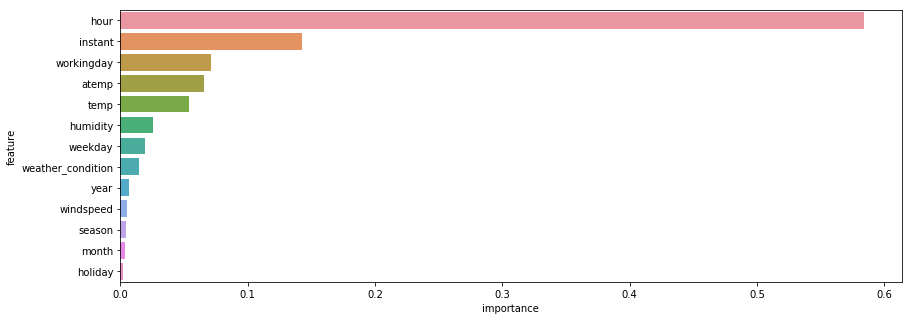

In [207]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

**Answers / comments / reasoning:**

-After hyperparamter tuning the RMSE was reduced from 125 to 42.

-Model can be made with the above important variables but there was no significant decrease in RMSE

## Part 5 - Optimise (revenue - cost) by adapting number of bicycles
**Tasks:**
1. Assume that the revenue per rental is x.
2. Each bicycle has costs of y per day.
3. Determine residuals from your test set (after predicting demand of bike sharing). Calculate mean and standard deviation and use it as approximation for a gaussian distribution where you can sample from.
4. Simulate the profit with a fixed number of `nmax` (from part 2) bicycles for the next 30 days. 
An availability of `nmax` bicycles per day should be enough to fullfill all demand. Calculate the demand by adding the simulated residuals to calculated expected values (or use real values?) from the data you put aside in part 1.
5. Use grid search to find the optimal number of bikes to obtain highest (revenue - cost) from simulations.


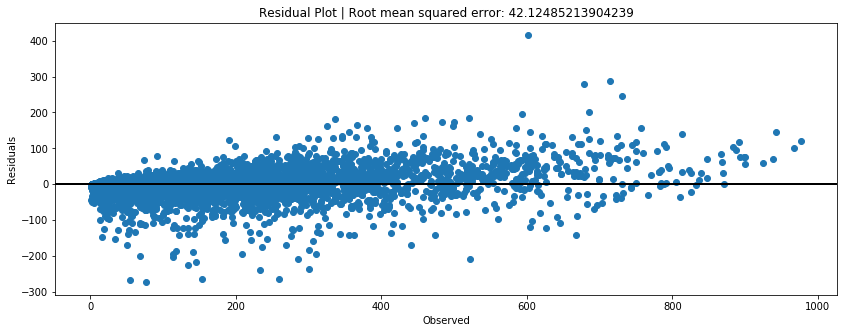

In [234]:
# Ploting the residuals
residuals = y_test-pred_y1
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root mean squared error: ' + str(np.sqrt(mean_squared_error(y_test, pred_y1))))
plt.show()

**Answers / comments / reasoning:**

-

## Part 6 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 